In [1]:
from analysis.data_exp1 import DataExp1
import numpy as np
import matplotlib as mpl
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

mpl.rc('font', **{'family': 'sans-serif', 'size': 20, 'weight': 'normal', 'sans-serif': ['Arial', 'LiberationSans-Regular', 'FreeSans']})

1
score by half: 122.0 / 116.0
score by reps: 110.0 / 128.0
accuracy by half: 0.73 / 0.73
accuracy by reps: 0.69 / 0.77
2
score by half: 79.0 / 94.0
score by reps: 75.0 / 98.0
accuracy by half: 0.57 / 0.68
accuracy by reps: 0.56 / 0.69
3
score by half: 92.0 / 115.0
score by reps: 90.0 / 117.0
accuracy by half: 0.61 / 0.72
accuracy by reps: 0.61 / 0.72
4
score by half: 65.0 / 94.0
score by reps: 75.0 / 84.0
accuracy by half: 0.57 / 0.63
accuracy by reps: 0.59 / 0.61
5
score by half: 94.0 / 95.0
score by reps: 91.0 / 98.0
accuracy by half: 0.64 / 0.67
accuracy by reps: 0.64 / 0.67
6
score by half: 62.0 / 90.0
score by reps: 72.0 / 80.0
accuracy by half: 0.5 / 0.63
accuracy by reps: 0.55 / 0.58
7
score by half: 131.0 / 124.0
score by reps: 132.0 / 123.0
accuracy by half: 0.77 / 0.74
accuracy by reps: 0.79 / 0.72
8
score by half: 72.0 / 73.0
score by reps: 67.0 / 78.0
accuracy by half: 0.57 / 0.59
accuracy by reps: 0.57 / 0.59
9
score by half: 103.0 / 94.0
score by reps: 97.0 / 100.0
accur

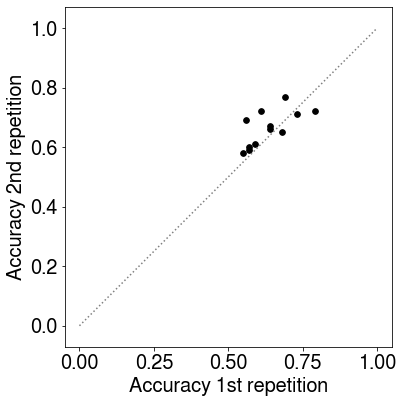

In [3]:
acc_rep1, acc_rep2 = [], []
for pid in DataExp1.pids:
    print(pid)
    data = DataExp1(pid)
    match = data.match()
    print('score by half: ', end='')
    data.idx = np.arange(0, 100)
    print(sum(data.score()), end=' / ')
    data.idx = np.arange(100, 200)
    print(sum(data.score()))
    print('score by reps: ', end='')
    data.idx = match[:, 0]
    print(sum(data.score()), end=' / ')
    data.idx = match[:, 1]
    print(sum(data.score()))
    print('accuracy by half: ', end='')
    data.idx = np.arange(0, 100)
    print(sum(data.score() > 0) / 100, end=' / ')
    data.idx = np.arange(100, 200)
    print(sum(data.score() > 0) / 100)
    print('accuracy by reps: ', end='')
    data.idx = match[:, 0]
    acc_rep1.append(sum(data.score() > 0) / 100)
    print(sum(data.score() > 0) / 100, end=' / ')
    data.idx = match[:, 1]
    acc_rep2.append(sum(data.score() > 0) / 100)
    print(sum(data.score() > 0) / 100)

x, y = acc_rep1, acc_rep2
print(ttest_rel(x, y))

_, ax = plt.subplots(figsize=(6,6))
plt.scatter(x, y, color='k', s=32)
xy_min, xy_max = 0, 1
plt.plot([xy_min, xy_max], [xy_min, xy_max], ':', color='gray')
ax.set_xlim((xy_min, xy_max))
ax.set_ylim((xy_min, xy_max))
ax.set_xlabel('Accuracy 1st repetition')
ax.set_ylabel('Accuracy 2nd repetition')
ax.axis('equal')
plt.tight_layout()
plt.show()
# plt.savefig('../pub/eLife/figs/accuracy_by_repetition.pdf', transparent=True)

confidence by reps: 0.81 / 0.89
confidence by reps: 0.47 / 0.55
confidence by reps: 0.79 / 0.75
confidence by reps: 0.62 / 0.65
confidence by reps: 0.61 / 0.57
confidence by reps: 0.57 / 0.46
confidence by reps: 0.93 / 0.87
confidence by reps: 0.44 / 0.37
confidence by reps: 0.59 / 0.59
confidence by reps: 0.57 / 0.43
confidence by reps: 0.61 / 0.52
confidence by reps: 0.67 / 0.73
Ttest_relResult(statistic=1.1601034999109818, pvalue=0.27056688595599454)


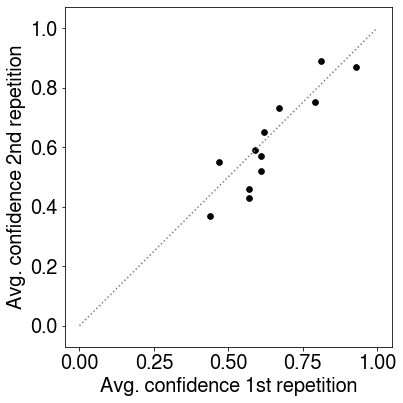

In [6]:
conf_rep1, conf_rep2 = [], []
for pid in DataExp1.pids:
    data = DataExp1(pid)
    match = data.match()
    print('confidence by reps: ', end='')
    conf_rep1.append(sum(data.df['confidence'][match[:, 0]] == 'high') / 100)
    print(conf_rep1[-1], end=' / ')
    data.idx = match[:, 1]
    conf_rep2.append(sum(data.df['confidence'][match[:, 1]] == 'high') / 100)
    print(conf_rep2[-1])
x, y = conf_rep1, conf_rep2
from scipy.stats import ttest_rel
print(ttest_rel(x, y))
_, ax = plt.subplots(figsize=(6,6))
plt.scatter(x, y, color='k', s=32)
xy_min, xy_max = 0, 1
plt.plot([xy_min, xy_max], [xy_min, xy_max], ':', color='gray')
ax.set_xlim((xy_min, xy_max))
ax.set_ylim((xy_min, xy_max))
ax.set_xlabel('Avg. confidence 1st repetition')
ax.set_ylabel('Avg. confidence 2nd repetition')
ax.axis('equal')
plt.tight_layout()
plt.show()
# plt.savefig('../pub/eLife/figs/confidence_by_repetition.pdf', transparent=True)